In [1]:
import h5py as hdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob 
import seaborn as sns
import os
import netCDF4 as cdf
from mpl_toolkits.basemap import Basemap
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
from mpl_toolkits import axes_grid1

def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)

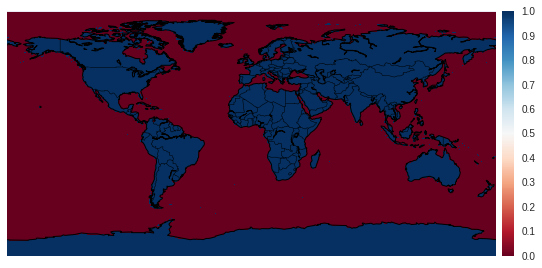

In [4]:
land_ocean_mask = '/usr/people/botiabo/Fluor_retrieval/Input/land_ocean_mask2_hd.asc'
seamask = np.flipud(np.genfromtxt(land_ocean_mask, skip_header=6))

xx, yy  = np.meshgrid(np.arange(-180,180,0.5),np.arange(-90,90,0.5))
map     = Basemap(projection='cyl', lat_0=0, lon_0=0)

fig     = plt.figure(1,figsize=(20,20))

ax      = fig.add_subplot(121)
imm     = map.pcolormesh(xx,yy,seamask,cmap='RdBu') # GnBU,Jet,coolwarm
cb      = add_colorbar(imm)
map.drawcoastlines()
map.drawcountries()
plt.show()

In [36]:
#path = '/usr/people/botiabo/botiabo/GOME2a_b_comparison/GPP Trendy/ORCHIDEE_S2_gpp_y.nc'
path = '/usr/people/botiabo/botiabo/GOME2a_b_comparison/GPP Trendy/LPJ_guess_data'
#path = ['/usr/people/botiabo/botiabo/GOME2a_b_comparison/GPP Trendy/'
#        ]
#suffix = '.nc'

In [37]:
dataA = cdf.Dataset(path)

In [50]:
dataA.variables

OrderedDict([(u'lon', <type 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    long_name: longitude
    units: degrees_east
    standard_name: longitude
unlimited dimensions: 
current shape = (720,)
filling off
), (u'lat', <type 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    long_name: latitude
    units: degrees_north
    standard_name: latitude
unlimited dimensions: 
current shape = (360,)
filling off
), (u'time', <type 'netCDF4._netCDF4.Variable'>
float64 time(time)
    units: day as %Y%m%d.%f
    calendar: proleptic_gregorian
unlimited dimensions: time
current shape = (1320,)
filling off
), (u'gpp', <type 'netCDF4._netCDF4.Variable'>
float32 gpp(time, lat, lon)
    code: 1
    _FillValue: -99999.0
unlimited dimensions: time
current shape = (1320, 360, 720)
filling off
)])

In [83]:
seamask.shape
type(gpp)

numpy.ndarray

In [107]:
gpp = np.ma.array(np.array(dataA.variables['gpp']))
gpp_mask = np.ma.masked_values(gpp,-99999.0) # no sirve
#gpp_mask = np.ma.masked_where(gpp[:]==-99999.0,gpp) # no sirve
#gpp_mask = np.ma.masked_where(seamask==0,gpp[:])
#gpp_mask = np.ma.masked_array(gpp,mask=-99999.)


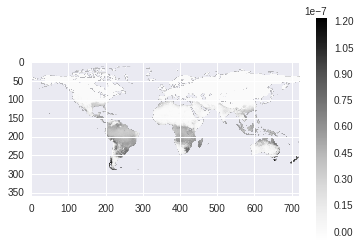

In [108]:
imshow(gpp_mask[0])
colorbar()
#clim(0,10)
#gome2a_avg[::-1,:]

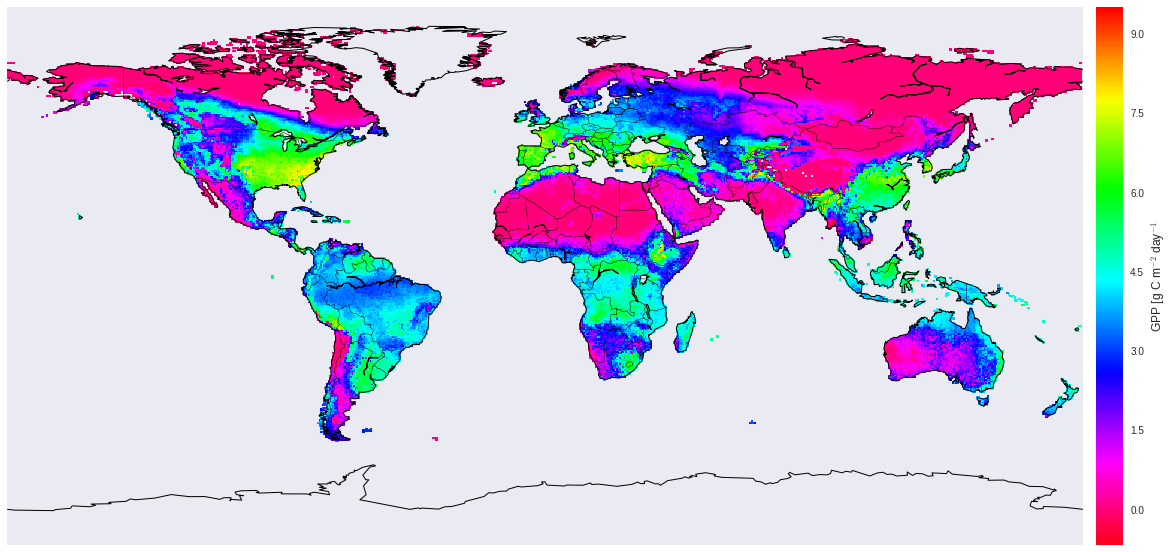

In [134]:
plot    = gpp_mask[1311]
xx, yy  = np.meshgrid(np.arange(-180,180,0.5),np.arange(-90,90,0.5))
map     = Basemap(projection='cyl', lat_0=0, lon_0=0)

fig     = plt.figure(1,figsize=(20,20))

ax      = fig.add_subplot(111)
imm     = map.pcolormesh(xx,yy,plot[::-1,:]*1000*86400,cmap='hsv_r') # GnBU,Jet,coolwarm
cb      = add_colorbar(imm)
#imm.set_clim(vmin=-2, vmax=2)
#ax.set_title('(Global  mean = %0.4f [mW m$^{-2}$ sr$^{-1}$ nm$^{-1}$])'%(ga),fontsize=12)
cb.set_label('GPP [g C m$^{-2}$ day$^{-1}$',fontsize=12)
map.drawcoastlines()
map.drawcountries()
#map.drawparallels(np.arange(-90,90,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[1,0,0,0],fontsize=11)
#map.drawmeridians(np.arange(-180,180,30),color='grey',linewidth=0.5,dashes=[1,0.0001],labels=[0,0,0,1],fontsize=11)


#plt.subplots_adjust(wspace=0.15)
#fig.savefig('/usr/people/botiabo/04_Report_and_old_notebooks/Report/GOME2_a_b_2_joiner.png',bbox_inches='tight',DPI=1000)
plt.show()


In [121]:
xx.shape

(360, 720)

In [122]:
plot.shape

(360, 720)

In [123]:
yy.shape

(360, 720)